In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 

In [0]:
pokefol=os.listdir("/content/drive/My Drive/Correct")

In [0]:
for i in pokefol :
  print(i)
print(len(pokefol))

Butterfree
Bulbasaur
Pikachu
Charizard
Abra
Tauros
Meowth
Pidgeot
Gastly
Charmeleon
10


In [0]:
pokeno=[]
pokechar=[]
pokename=[]



In [0]:
basepath="/content/drive/My Drive/Correct"
for index,nam in enumerate(pokefol):
  newpath=basepath + "/" + nam 
  pokename.append(nam)
  for j in os.listdir(newpath):
    impath=newpath+"/"+j
    img=cv2.imread(impath)
    
    pokechar.append(img)
    pokeno.append(index)



    
    
  

  

In [0]:
print(pokename)
print(pokechar[1])
print(pokeno)
pokechar=np.array(pokechar)
pokename=np.array(pokename)
pokeno=np.array(pokeno)
print(pokeno.shape)
print(pokechar.shape)

['Butterfree', 'Bulbasaur', 'Pikachu', 'Charizard', 'Abra', 'Tauros', 'Meowth', 'Pidgeot', 'Gastly', 'Charmeleon']
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 255 255]
  [251 255 255]
  [249 251 251]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 250 251]
  [255 254 255]
  [255 255 255]]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
def draw(img,title):
  plt.imshow(img)
  plt.style.use("seaborn")
  plt.axis("off")
  plt.title(title)
  


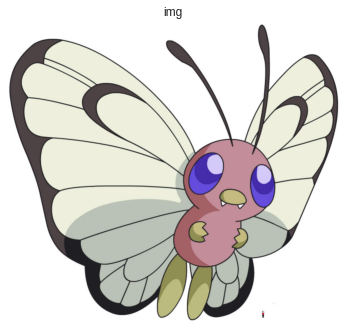

In [0]:
draw(pokechar[10],"img")

In [0]:
def imprepro(img):
  img=cv2.resize(img,(28,28))
  img=np.array(img,dtype=np.uint8)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=img/255
  img=img.reshape(28,28,1)
  
  
  return img


(800, 800, 3)
(800, 800)


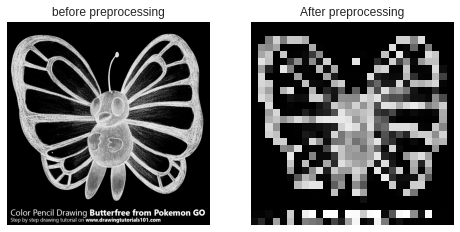

In [0]:
plt.figure()
plt.subplot(1,2,1)
print(pokechar[5].shape)
p = np.array(pokechar[5], dtype=np.uint8)
p=cv2.cvtColor(p,cv2.COLOR_BGR2GRAY)
print(p.shape)
draw(p,"before preprocessing")
plt.subplot(1,2,2)
img=pokechar[5]
img=cv2.resize(img,(28,28))
img=np.array(img,dtype=np.uint8)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=img/255
draw(img,"After preprocessing")
  

In [0]:
pokechar=np.array(list(map(imprepro,pokechar)))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(pokechar,pokeno,shuffle=True)


In [0]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(798, 28, 28, 1) (267, 28, 28, 1) (798,) (267,)


In [0]:
import keras

In [0]:
from keras.layers import Conv2D,Dropout,Dense,Flatten,MaxPool2D,Softmax,Activation
from keras.models import Sequential
from keras.utils import to_categorical


In [0]:
model=Sequential()

In [0]:
model.add(Conv2D(16,(3,3),input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(100))     # i am considering 127 generations of pokemon 
model.add(Dropout(0.4))    # making it more generic 
model.add(Activation("sigmoid"))


model.add(Dense(10))     # i have  considering  take count of classes of pokemon  
model.add(Dropout(0.4))     # in my small dataset i have taken only 4 pokemon classes 

model.add(Activation("softmax"))# so final no of neuron is 4
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
activation_22 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
activation_23 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 64)         

In [0]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)


## **Without Data Augmentation**

In [0]:
history=model.fit(xtrain,ytrain,batch_size=5,epochs=50,validation_data=(xtest,ytest))

Train on 798 samples, validate on 267 samples
Epoch 1/50
798/798 [==============================] - 1s 2ms/step - loss: 2.1633 - acc: 0.2581 - val_loss: 2.0429 - val_acc: 0.2884
Epoch 2/50
798/798 [==============================] - 1s 1ms/step - loss: 2.1352 - acc: 0.2644 - val_loss: 2.0360 - val_acc: 0.2884
Epoch 3/50
798/798 [==============================] - 1s 999us/step - loss: 2.1671 - acc: 0.2406 - val_loss: 2.0385 - val_acc: 0.2734
Epoch 4/50
798/798 [==============================] - 1s 1ms/step - loss: 2.1249 - acc: 0.2569 - val_loss: 2.0194 - val_acc: 0.2884
Epoch 5/50
798/798 [==============================] - 1s 1ms/step - loss: 2.1336 - acc: 0.2469 - val_loss: 2.0180 - val_acc: 0.2734
Epoch 6/50
798/798 [==============================] - 1s 1ms/step - loss: 2.0758 - acc: 0.3145 - val_loss: 1.9223 - val_acc: 0.2846
Epoch 7/50
798/798 [==============================] - 1s 1ms/step - loss: 2.0547 - acc: 0.2945 - val_loss: 1.9121 - val_acc: 0.3221
Epoch 8/50
798/798 [========

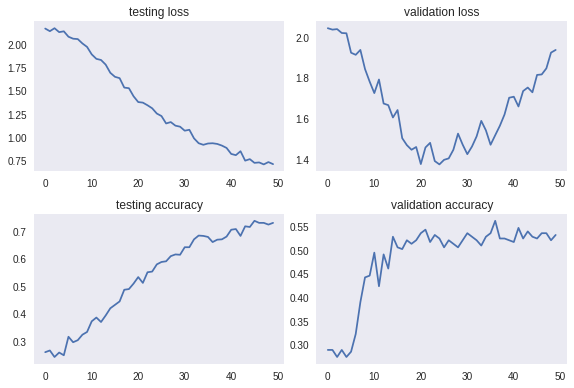

In [0]:
plt.figure()
plt.subplot(2,2,1)
plt.grid()
plt.plot(history.history['loss'])
plt.title("testing loss")
plt.subplot(2,2,2)
plt.grid()
plt.plot(history.history['val_loss'])
plt.title("validation loss")
plt.subplot(2,2,3)
plt.grid()
plt.plot(history.history['acc'])
plt.title("testing accuracy")
plt.subplot(2,2,4)
plt.grid()
plt.plot(history.history['val_acc'])
plt.title("validation accuracy")
plt.tight_layout()
plt.show()



## **With Data Augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
dataagmen=ImageDataGenerator(rotation_range=20,shear_range=0.1,height_shift_range=0.1,width_shift_range=0.1)

In [0]:
dataagmen.fit(xtrain)

In [0]:
history2=model.fit_generator(dataagmen.flow(xtrain , ytrain,batch_size=5),
         shuffle=True,
         epochs = 50,
         validation_data=(xtest,ytest))

Epoch 1/50
160/160 [==============================] - 1s 7ms/step - loss: 2.1059 - acc: 0.3708 - val_loss: 1.7127 - val_acc: 0.5131
Epoch 2/50
160/160 [==============================] - 1s 7ms/step - loss: 1.9038 - acc: 0.3800 - val_loss: 1.6461 - val_acc: 0.5243
Epoch 3/50
160/160 [==============================] - 1s 6ms/step - loss: 1.8389 - acc: 0.4029 - val_loss: 1.6850 - val_acc: 0.4906
Epoch 4/50
160/160 [==============================] - 1s 6ms/step - loss: 1.7603 - acc: 0.4146 - val_loss: 1.5247 - val_acc: 0.5243
Epoch 5/50
160/160 [==============================] - 1s 7ms/step - loss: 1.7181 - acc: 0.4246 - val_loss: 1.4215 - val_acc: 0.5019
Epoch 6/50
160/160 [==============================] - 1s 7ms/step - loss: 1.7380 - acc: 0.4071 - val_loss: 1.5782 - val_acc: 0.5056
Epoch 7/50
160/160 [==============================] - 1s 6ms/step - loss: 1.6469 - acc: 0.4329 - val_loss: 1.5797 - val_acc: 0.5169
Epoch 8/50
160/160 [==============================] - 1s 7ms/step - loss: 1.

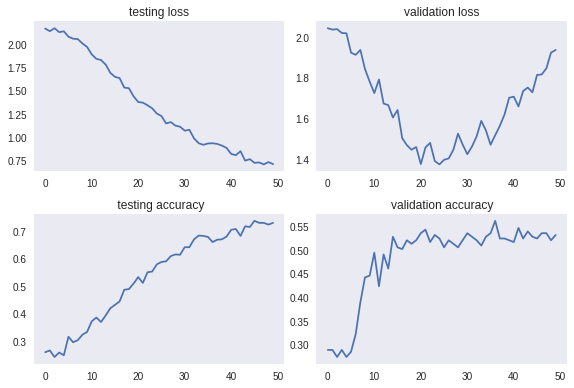

In [0]:
plt.figure()
plt.subplot(2,2,1)
plt.grid()
plt.plot(history.history['loss'])
plt.title("testing loss")
plt.subplot(2,2,2)
plt.grid()
plt.plot(history.history['val_loss'])
plt.title("validation loss")
plt.subplot(2,2,3)
plt.grid()
plt.plot(history.history['acc'])
plt.title(" testing accuracy")
plt.subplot(2,2,4)
plt.grid()
plt.plot(history.history['val_acc'])
plt.title("validation accuracy")
plt.tight_layout()
plt.show()
